# Классификация гендера человека - прогнозирование пола





## Постановка задачи

Нужно спрогнозировать, какого пола человек. Предоставлена информация о любимых вещах человека. 

## Загрузка библиотек

In [5]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

## Парсинг данных

In [7]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv("Transformed Data Set - Sheet1.csv", sep = ',')

In [8]:
df.head(20)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
5,Warm,Jazz/Blues,Doesn't drink,Fanta,F
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
7,Warm,Pop,Whiskey,Fanta,F
8,Warm,Rock,Other,7UP/Sprite,F
9,Neutral,Pop,Wine,Coca Cola/Pepsi,F


## Описание данных

* Favorite Color - температура любимого цвета
* Favorite Music Genre - любимый жанр музыки
* Favorite Beverage - любимый напиток
* Favorite Soft Drink - любимый безалкогольный напиток

Целевой признак: 

* Gender - gjk

## Разведочный анализ данных

In [9]:
# вывод размерности
df.shape

(66, 5)

датафрейм содержит 66 строк и 5 столбцов

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


Набор данных имеет 66 записей типа object. Пропущенных значений нет.

In [11]:
# выводим типы данных
df.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

In [12]:
# описательная статистика 
df.describe().T

,count,unique,top,freq
Favorite Color,66,3,Cool,37
Favorite Music Genre,66,7,Rock,19
Favorite Beverage,66,6,Doesn't drink,14
Favorite Soft Drink,66,4,Coca Cola/Pepsi,32
Gender,66,2,F,33


In [13]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [14]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [15]:
df.duplicated().sum() 

4

In [16]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        62 non-null     object
 1   Favorite Music Genre  62 non-null     object
 2   Favorite Beverage     62 non-null     object
 3   Favorite Soft Drink   62 non-null     object
 4   Gender                62 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


Было найдено и удалено 4 дубликата

In [17]:
df['Favorite Color'].value_counts()


Favorite Color
Cool       33
Warm       22
Neutral     7
Name: count, dtype: int64

In [18]:
df['Favorite Music Genre'].value_counts()


Favorite Music Genre
Pop                 17
Rock                16
Electronic           8
Hip hop              7
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: count, dtype: int64

In [19]:
df['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    14
Beer             12
Wine             10
Other            10
Whiskey           9
Vodka             7
Name: count, dtype: int64

In [20]:
df['Favorite Soft Drink'].value_counts()

Favorite Soft Drink
Coca Cola/Pepsi    28
Fanta              14
7UP/Sprite         13
Other               7
Name: count, dtype: int64

In [21]:
df["Gender"].value_counts()


Gender
F    31
M    31
Name: count, dtype: int64

Каких-то некорректных значений не замечено, количество мужчин и женщин одинаковое


## Визуальный анализ

In [22]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()
le = LabelEncoder()
for col in df.columns:
    data[col] = le.fit_transform(df[col])
    
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
59,0,4,4,3,1
60,0,0,4,1,1
63,1,2,1,2,1
64,0,6,5,1,1


array([[<Axes: title={'center': 'Favorite Color'}>,
        <Axes: title={'center': 'Favorite Music Genre'}>],
       [<Axes: title={'center': 'Favorite Beverage'}>,
        <Axes: title={'center': 'Favorite Soft Drink'}>],
       [<Axes: title={'center': 'Gender'}>, <Axes: >]], dtype=object)

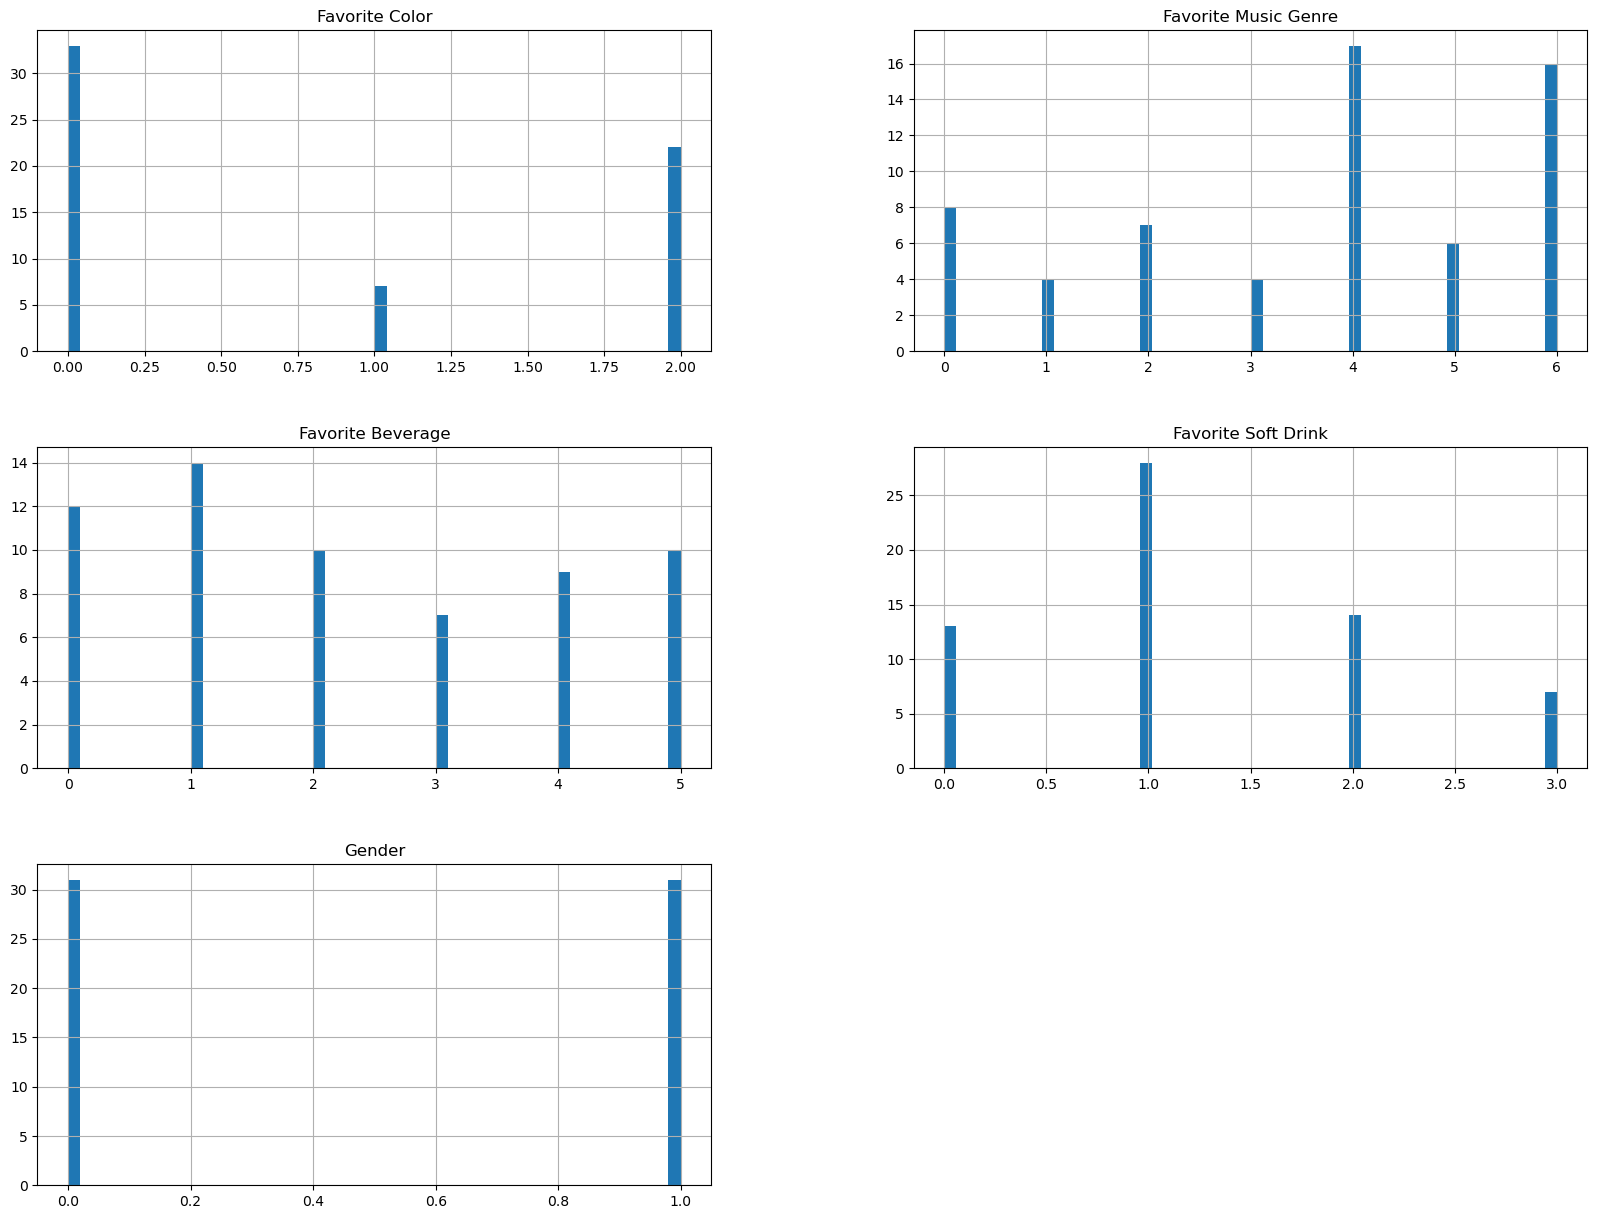

In [23]:
data.hist(figsize = (20,15), bins = 50)

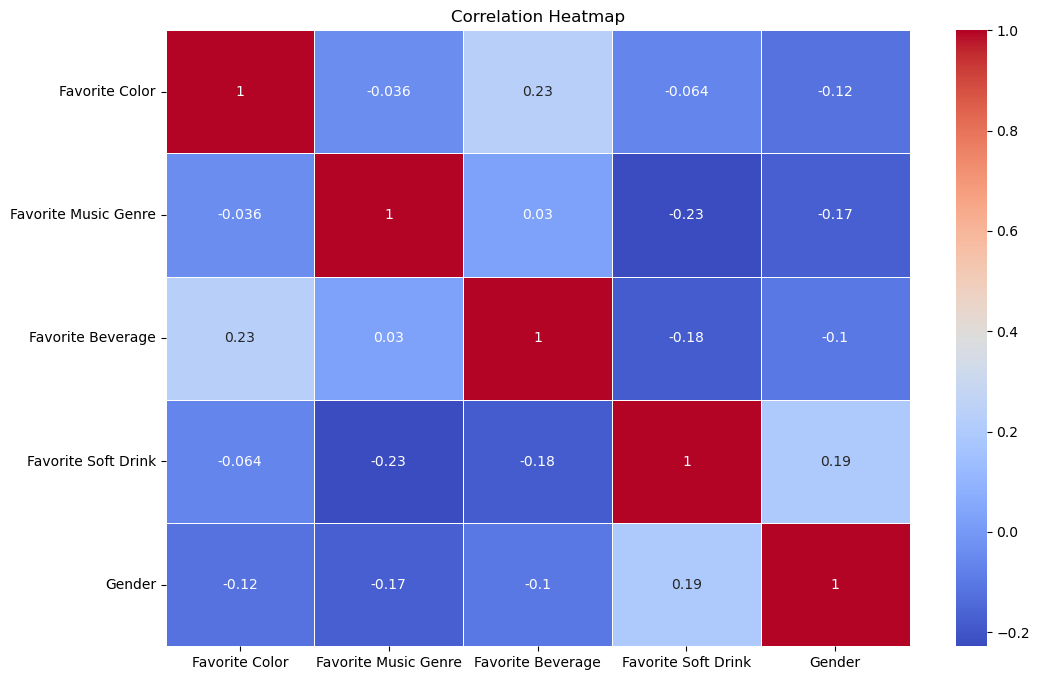

In [24]:
corr_matrix = data.corr()

# Создание тепловой таблицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\noutb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


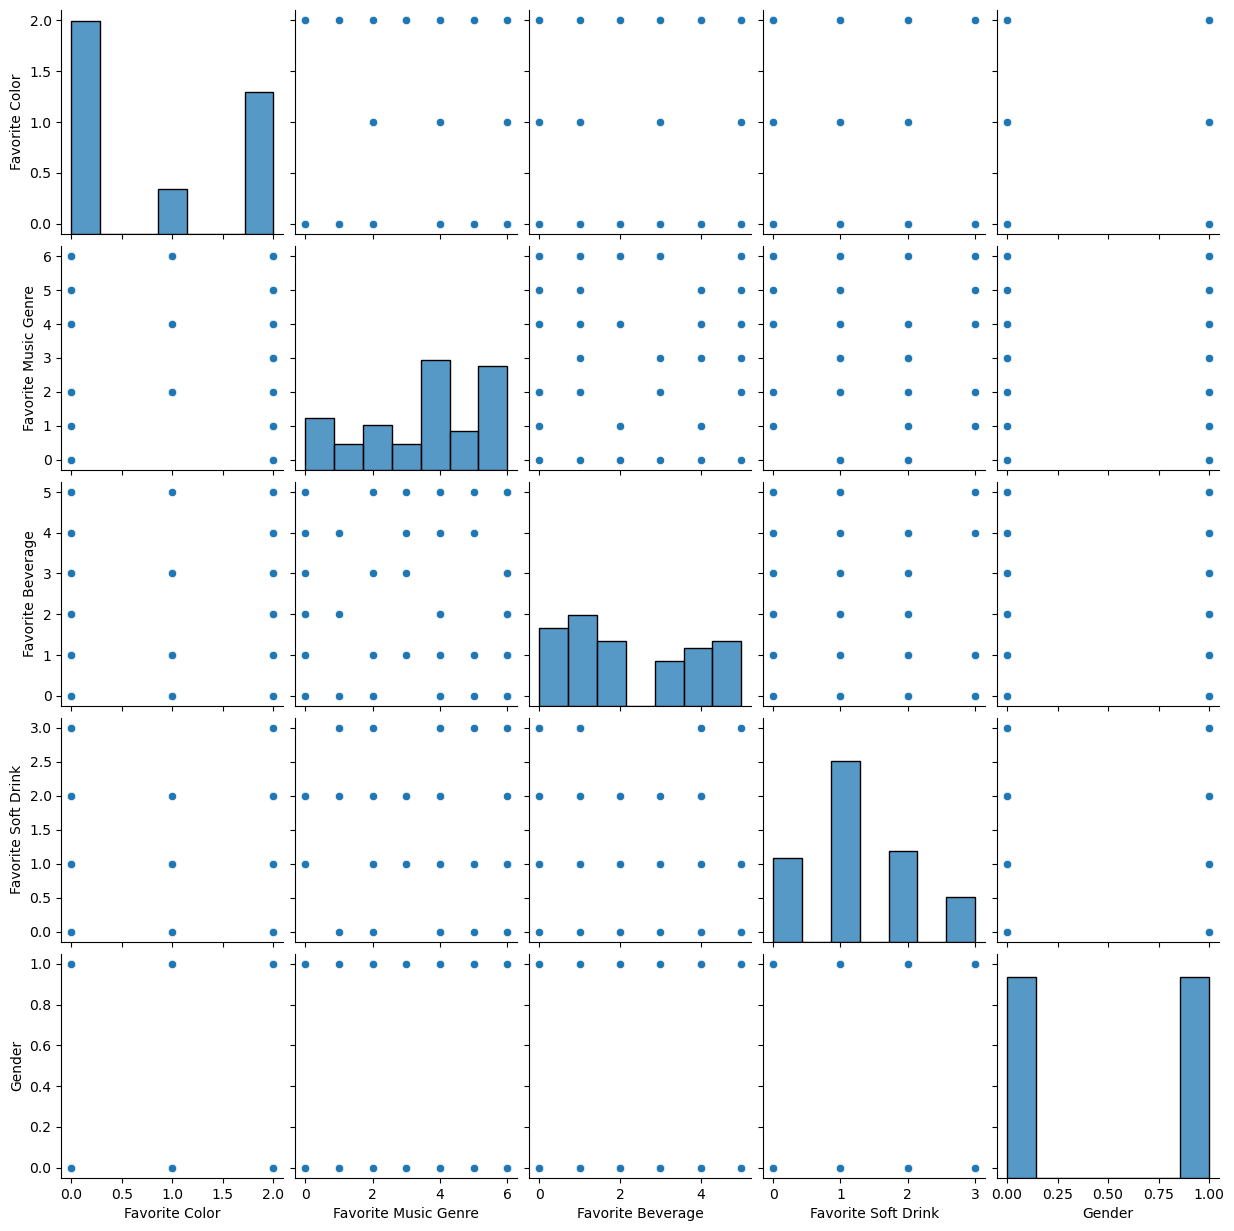

In [25]:
sns.pairplot(data);

Зависимости или выбросы не наблюдаются

## Преобразование данных

In [26]:
df = pd.get_dummies(df)
df.head()

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,...,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other,Gender_F,Gender_M
0,True,False,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False
1,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,False,False,True,False,False,False,False,False,False,True,...,False,False,False,True,False,True,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False


Разделим значения параметров на отдельные столбцы

In [27]:
df = df.astype(int)
#преобразуем в числовые значения

In [28]:
# Объединение столбцов Gender_F и Gender_M в один столбец Gender
df['Gender'] = df.apply(lambda row: 1 if row['Gender_F'] else 0 if row['Gender_M'] else None, axis=1)

# Удаление старых столбцов Gender_F и Gender_M
df.drop(columns=['Gender_F', 'Gender_M'], inplace=True)

Проверяем преобразование

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 65
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Favorite Color_Cool                    62 non-null     int32
 1   Favorite Color_Neutral                 62 non-null     int32
 2   Favorite Color_Warm                    62 non-null     int32
 3   Favorite Music Genre_Electronic        62 non-null     int32
 4   Favorite Music Genre_Folk/Traditional  62 non-null     int32
 5   Favorite Music Genre_Hip hop           62 non-null     int32
 6   Favorite Music Genre_Jazz/Blues        62 non-null     int32
 7   Favorite Music Genre_Pop               62 non-null     int32
 8   Favorite Music Genre_R&B and soul      62 non-null     int32
 9   Favorite Music Genre_Rock              62 non-null     int32
 10  Favorite Beverage_Beer                 62 non-null     int32
 11  Favorite Beverage_Doesn't drink        

In [30]:
df.head(66)

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,...,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other,Gender
0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
60,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
63,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
64,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


## Обучение классификатора

In [34]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split




In [39]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [40]:
X = df.drop('Gender', axis=1)
y = df['Gender']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


##  Метод опорных векторов (SVC)

In [41]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [42]:
svc_pred_test = svc.predict(X_test)
display(svc_pred_test[:20], np.array(y_test[:20]))

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1],
      dtype=int64)

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [43]:
svc_train_predict = svc.predict(X_train)
svc_train_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [44]:
print(classification_report(y_test, svc_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.80      0.67      0.73        12

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.73      0.71      0.72        21



In [45]:
print(precision_score(y_test, svc_pred_test))
print(recall_score(y_test, svc_pred_test))
print(f1_score(y_test, svc_pred_test))

0.8
0.6666666666666666
0.7272727272727272


In [46]:
svc_accuracy = accuracy_score(y_test, svc_pred_test)
svc_accuracy

0.7142857142857143

In [47]:
print('train accuracy: ', accuracy_score(y_train, svc_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, svc_pred_test, normalize=True))

train accuracy:  0.9024390243902439
test accuracy:  0.7142857142857143


In [48]:
print('test mean_squared_error: ', mean_squared_error(y_test, svc_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, svc_pred_test))

test mean_squared_error:  0.2857142857142857
test mean_absolute_error:  0.2857142857142857


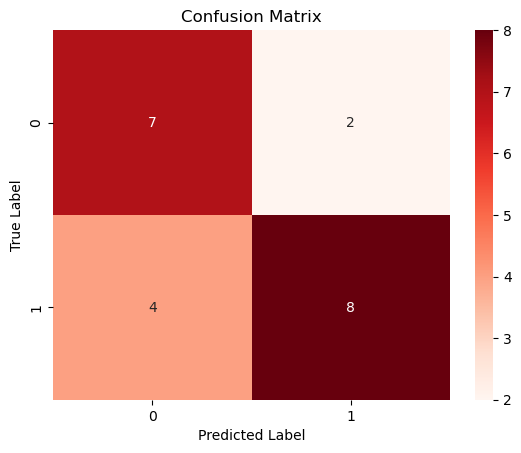

In [49]:
cm = confusion_matrix(y_test, svc_pred_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, svc_pred_test, average='macro')

0.7222222222222222

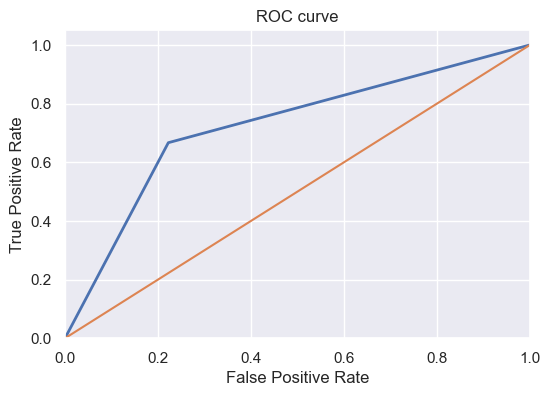

In [51]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, svc_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Random Forest Classifier (Классификатор дерева решений)

In [52]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [53]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [54]:
rfc_train_predict = rfc.predict(X_train)
rfc_train_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [55]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.64      0.75      0.69        12

    accuracy                           0.62        21
   macro avg       0.61      0.60      0.60        21
weighted avg       0.61      0.62      0.61        21



In [56]:
print(precision_score(y_test, rfc_pred_test))
print(recall_score(y_test, rfc_pred_test))
print(f1_score(y_test, rfc_pred_test))

0.6428571428571429
0.75
0.6923076923076924


In [57]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_accuracy

0.6190476190476191

In [58]:
print('train accuracy: ', accuracy_score(y_train, rfc_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_pred_test, normalize=True))

train accuracy:  0.9512195121951219
test accuracy:  0.6190476190476191


In [59]:
print('test mean_squared_error: ', mean_squared_error(y_test, rfc_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, rfc_pred_test))

test mean_squared_error:  0.38095238095238093
test mean_absolute_error:  0.38095238095238093


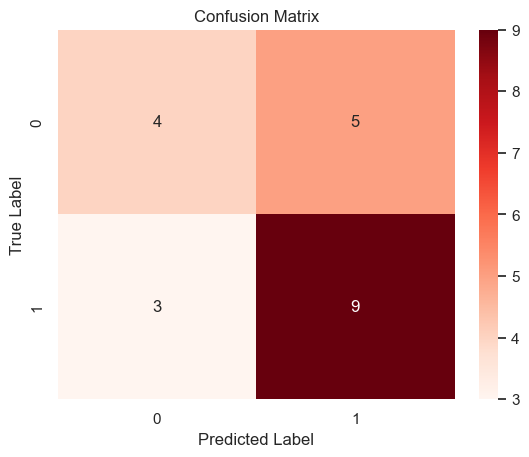

In [60]:
cm = confusion_matrix(y_test, rfc_pred_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [61]:
roc_auc_score(y_test, rfc_pred_test, average='macro')

0.5972222222222222

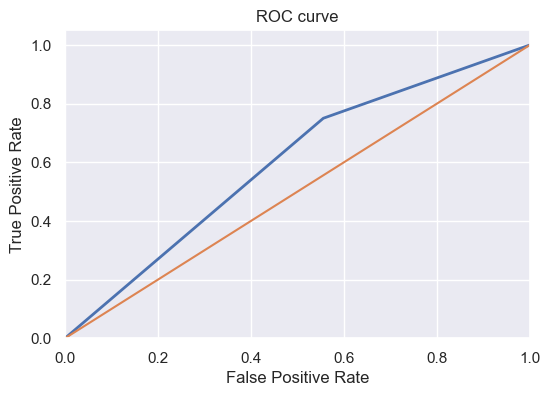

In [62]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## KNeighborsClassifier (Классификация ближайших соседей)

In [66]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
X_test_np = np.asarray(X_test)
knn_pred_test = knn.predict(X_test_np)
display(knn_pred_test[:20], np.array(y_test[:20]))

C:\Users\noutb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [72]:
X_train_np = np.asarray(X_train)
knn_train_predict = knn.predict(X_train_np)
knn_train_predict

C:\Users\noutb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [73]:
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.67      0.67      0.67        12

    accuracy                           0.62        21
   macro avg       0.61      0.61      0.61        21
weighted avg       0.62      0.62      0.62        21



In [74]:
print(precision_score(y_test, knn_pred_test))
print(recall_score(y_test, knn_pred_test))
print(f1_score(y_test, knn_pred_test))

0.6666666666666666
0.6666666666666666
0.6666666666666666


In [75]:
knn_accuracy = accuracy_score(y_test, knn_pred_test)
knn_accuracy

0.6190476190476191

In [76]:
print('train accuracy: ', accuracy_score(y_train, knn_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, knn_pred_test, normalize=True))

train accuracy:  0.7317073170731707
test accuracy:  0.6190476190476191


In [77]:
print('test mean_squared_error: ', mean_squared_error(y_test, knn_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, knn_pred_test))

test mean_squared_error:  0.38095238095238093
test mean_absolute_error:  0.38095238095238093


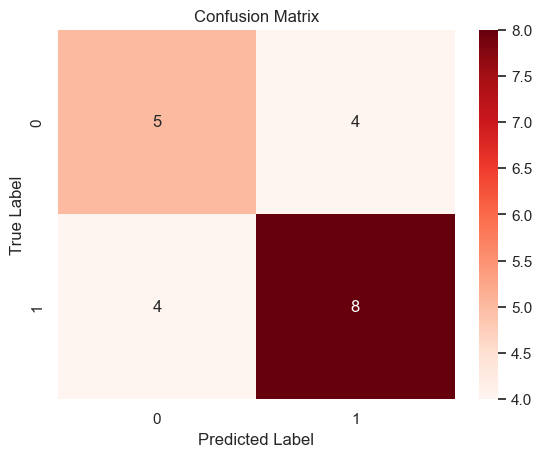

In [78]:
cm = confusion_matrix(y_test, knn_pred_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [79]:
roc_auc_score(y_test, knn_pred_test, average='macro')

0.6111111111111112

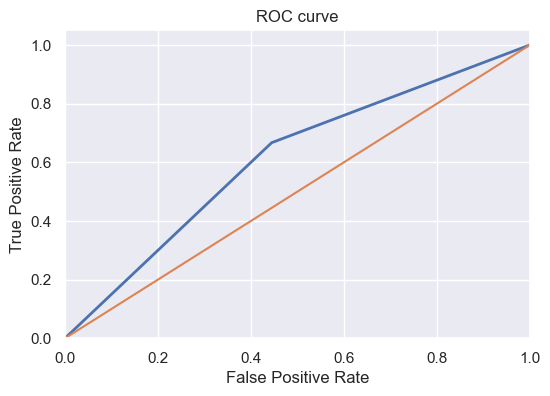

In [80]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Метрики

In [81]:
classifiers =["KNeighborsClassifier",  "Random Forest Classifier", "SVC"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, rfc_accuracy, svc_accuracy]

In [82]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.619048
1,Random Forest Classifier,0.619048
2,SVC,0.714286


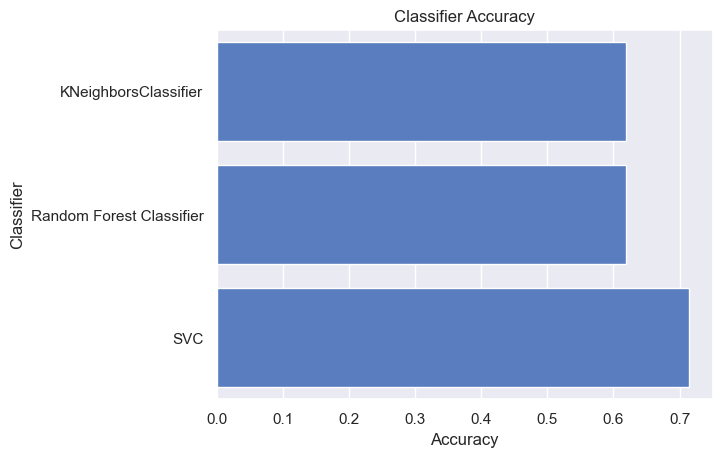

In [83]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

Модель SVC показывает лучшие результаты по всем метрикам: точность (accuracy), precision, recall и f1-score. Поэтому можно сделать вывод, что SVC является лучшей среди представленных.

